In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import itertools
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
code_dir = os.path.realpath(os.path.join(os.getcwd(), ".."))
import sys
sys.path.append(code_dir)
from mechaqredo.params import validate_params_dict, default_params_dict
from mechaqredo.sim import run_single_sim,estimate_sensitivity,get_single_derivative
from mechaqredo.generate_scenarios import generate_full_scenario

In [2]:
SIMULATION_LENGHT=365 * 2

sd = {"service_fee_model": 'optimistic', "price_model": 'optimistic', "n_validators": 'optimistic', "n_trx": 'optimistic'}


params=default_params_dict(SIMULATION_LENGHT)
params_dict = generate_full_scenario(
    params_dict=params, scenarios_dict=sd, forecast_length=SIMULATION_LENGHT
)
df=run_single_sim(SIMULATION_LENGHT,params)
df
df.columns

Index(['iteration', 'circ_supply', 'day_burned', 'day_vested', 'day_locked',
       'day_released', 'staking_rewards_vested', 'staking_rewards_ecosystem',
       'total_staking_rewards', 'validators_rewards', 'market_cap',
       'day_burn_fees', 'day_service_fee_locked', 'ecosystem_fund',
       'staking_tvl', 'n_txs', 'token_price', 'service_fees', 'n_validators',
       'day_inflation', 'year_inflation'],
      dtype='object')

In [3]:
df=get_single_derivative(SIMULATION_LENGHT,with_respect_to='tipping_rate',input_params_dict=params,seed=0)
print('A single derivative')
df

A single derivative


,iteration,circ_supply,day_burned,day_vested,day_locked,day_released,staking_rewards_vested,staking_rewards_ecosystem,total_staking_rewards,validators_rewards,...,day_burn_fees,day_service_fee_locked,ecosystem_fund,staking_tvl,n_txs,token_price,service_fees,n_validators,day_inflation,year_inflation
0,0.0,-3.142105e+04,0.0,0.0,31421.052635,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,31421.052632,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,-6.213066e+04,0.0,0.0,30709.606194,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,30709.606194,3.070961e+04,0.000000,0.0,0.0,0.0,0.0,-0.000073,NaN
2,0.0,-9.254413e+04,0.0,0.0,30418.390921,4.922373,0.0,4.922373,4.922373,2.461187,...,0.0,30418.390921,6.112307e+04,0.000000,0.0,0.0,0.0,0.0,-0.000072,NaN
3,0.0,-1.235329e+05,0.0,0.0,30998.598310,9.804453,0.0,9.804453,9.804453,4.902226,...,0.0,30997.367717,9.211064e+04,1.230593,0.0,0.0,0.0,0.0,-0.000074,NaN
4,0.0,-1.558332e+05,0.0,0.0,32315.071175,14.785811,0.0,14.785811,14.785811,7.392906,...,0.0,32312.620062,1.244085e+05,3.681707,0.0,0.0,0.0,0.0,-0.000077,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,-2.096738e+07,0.0,0.0,24911.776607,2301.580109,0.0,1848.449354,1848.449354,924.224677,...,0.0,24450.160293,2.092773e+07,8230.969596,0.0,0.0,0.0,0.0,-0.000022,-0.006845
726,0.0,-2.098920e+07,0.0,0.0,24118.326258,2303.998450,0.0,1850.428547,1850.428547,925.214274,...,0.0,23656.213920,2.094954e+07,8239.512031,0.0,0.0,0.0,0.0,-0.000021,-0.006832
727,0.0,-2.101100e+07,0.0,0.0,24106.746803,2306.355207,0.0,1852.337506,1852.337506,926.168753,...,0.0,23644.139666,2.097133e+07,8248.101466,0.0,0.0,0.0,0.0,0.000058,-0.006740
728,0.0,-2.103240e+07,0.0,0.0,23712.249314,2308.719729,0.0,1854.245211,1854.245211,927.122606,...,0.0,23249.164937,2.099272e+07,8256.711325,0.0,0.0,0.0,0.0,-0.000021,-0.006802


In [4]:
with_respect_to='staking_renewal_rate'
h=params[with_respect_to]*0.01
params[with_respect_to]  
    


0.8

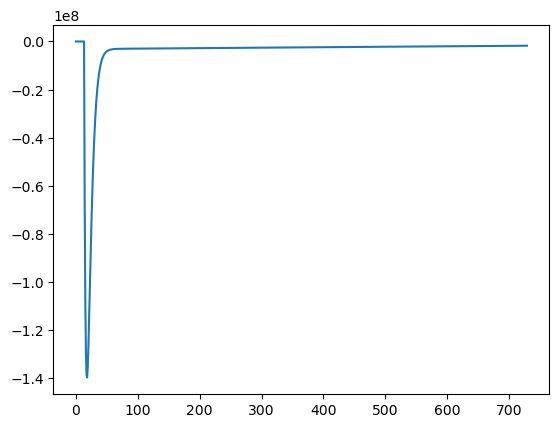

In [5]:
    seed=0
    np.random.seed(seed)
    df0=run_single_sim(SIMULATION_LENGHT, params)
    np.random.seed(seed)
    params[with_respect_to]+=h
    df1=run_single_sim(SIMULATION_LENGHT, params)
    params[with_respect_to]-=h
    plt.plot((-df0['circ_supply']+df1['circ_supply'])/h)
    

In [11]:
Ntr=20
tr=np.linspace(0.1,0.95,Ntr)
time=np.arange(SIMULATION_LENGHT)
derivatives=np.zeros((len(tr),len(time)))
import tqdm
for i in tqdm.tqdm(range(Ntr)):
    params=default_params_dict(SIMULATION_LENGHT)
    params_dict = generate_full_scenario(
    params_dict=params, scenarios_dict=sd, forecast_length=SIMULATION_LENGHT)
    
    params['protocol_fee_rate']=0.1*np.random.random()
    params['min_stake_amount']=5000*np.random.random()
    params["min_stake_duration"]= np.random.randint(56)
    params["validator_reward_share"]=np.random.random()
    
    params['staking_renewal_rate']=tr[i]
    df=estimate_sensitivity(SIMULATION_LENGHT,with_respect_to='staking_renewal_rate',input_params_dict=params,N=100)
    derivatives[i]=df['staking_tvl'].values


  0%|                                                                                                                 | 0/20 [00:00<?, ?it/s]

Estimating sensitivity wrt staking_renewal_rate


  5%|█████▎                                                                                                   | 1/20 [00:01<00:28,  1.52s/it]

Estimating sensitivity wrt staking_renewal_rate


 10%|██████████▌                                                                                              | 2/20 [00:02<00:26,  1.49s/it]

Estimating sensitivity wrt staking_renewal_rate


 15%|███████████████▊                                                                                         | 3/20 [00:04<00:25,  1.49s/it]

Estimating sensitivity wrt staking_renewal_rate


 20%|█████████████████████                                                                                    | 4/20 [00:05<00:23,  1.49s/it]

Estimating sensitivity wrt staking_renewal_rate


 25%|██████████████████████████▎                                                                              | 5/20 [00:07<00:22,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 30%|███████████████████████████████▌                                                                         | 6/20 [00:08<00:20,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 35%|████████████████████████████████████▊                                                                    | 7/20 [00:10<00:19,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 40%|██████████████████████████████████████████                                                               | 8/20 [00:11<00:17,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 45%|███████████████████████████████████████████████▎                                                         | 9/20 [00:13<00:16,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 50%|████████████████████████████████████████████████████                                                    | 10/20 [00:14<00:14,  1.47s/it]

Estimating sensitivity wrt staking_renewal_rate


 55%|█████████████████████████████████████████████████████████▏                                              | 11/20 [00:16<00:13,  1.47s/it]

Estimating sensitivity wrt staking_renewal_rate


 60%|██████████████████████████████████████████████████████████████▍                                         | 12/20 [00:17<00:11,  1.47s/it]

Estimating sensitivity wrt staking_renewal_rate


 65%|███████████████████████████████████████████████████████████████████▌                                    | 13/20 [00:19<00:10,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 70%|████████████████████████████████████████████████████████████████████████▊                               | 14/20 [00:20<00:08,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 75%|██████████████████████████████████████████████████████████████████████████████                          | 15/20 [00:22<00:07,  1.49s/it]

Estimating sensitivity wrt staking_renewal_rate


 80%|███████████████████████████████████████████████████████████████████████████████████▏                    | 16/20 [00:23<00:05,  1.49s/it]

Estimating sensitivity wrt staking_renewal_rate


 85%|████████████████████████████████████████████████████████████████████████████████████████▍               | 17/20 [00:25<00:04,  1.49s/it]

Estimating sensitivity wrt staking_renewal_rate


 90%|█████████████████████████████████████████████████████████████████████████████████████████████▌          | 18/20 [00:26<00:02,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▊     | 19/20 [00:28<00:01,  1.48s/it]

Estimating sensitivity wrt staking_renewal_rate


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.48s/it]


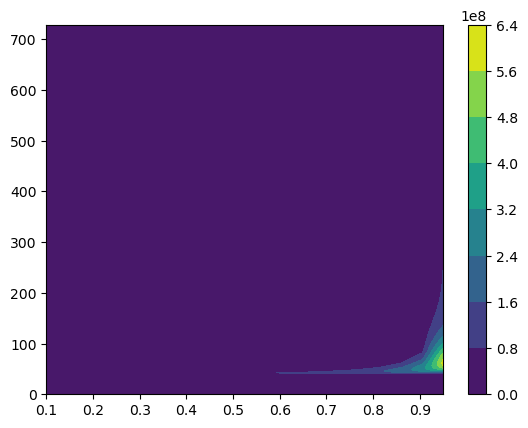

In [12]:
TR,TIME=np.meshgrid(tr,time)
p=plt.contourf(TR,TIME,derivatives.T)
plt.colorbar(p)

Text(0.5, 1.0, 'staking_tvl')

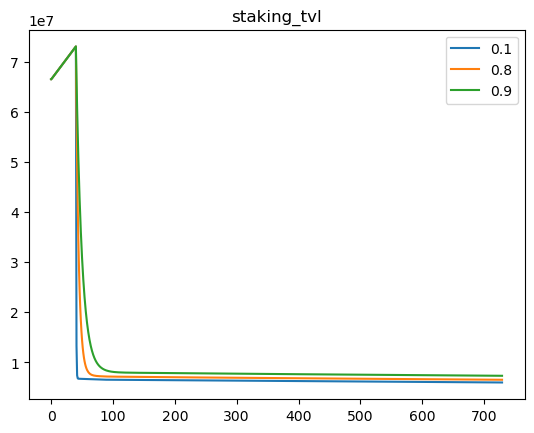

In [14]:
QoI='staking_tvl'
params['staking_renewal_rate']=0.1
plt.plot(run_single_sim(SIMULATION_LENGHT,params)[QoI],label=0.1)
params['staking_renewal_rate']=0.8
plt.plot(run_single_sim(SIMULATION_LENGHT,params)[QoI],label=0.8)
params['staking_renewal_rate']=0.9
plt.plot(run_single_sim(SIMULATION_LENGHT,params)[QoI],label=0.9)
plt.legend()
plt.title(QoI)